# Womens Clothing E-Commerce Reviews

**About Dataset** 

This is a Women’s Clothing E-Commerce dataset revolving around the reviews written by customers. Its nine supportive features offer a great environment to parse out the text through its multiple dimensions. Because this is real commercial data, it has been anonymized, and references to the company in the review text and body have been replaced with “retailer”.

License  
**CC0: Public Domain**

**Content**  


This dataset includes 23486 rows and 10 feature variables. Each row corresponds to a customer review, and includes the variables:

**Clothing ID**: Integer Categorical variable that refers to the specific piece being reviewed.  
**Age**: Positive Integer variable of the reviewers age.  
**Title**: String variable for the title of the review.  
**Review Text**: String variable for the review body.  
**Rating**: Positive Ordinal Integer variable for the product score granted by the customer from 1 Worst, to 5 Best.  
**Recommended IND**: Binary variable stating where the customer recommends the product where `1` is recommended, `0` is not recommended.  
**Positive Feedback Count**: Positive Integer documenting the number of other customers who found this review positive.  
**Division Name**: Categorical name of the product high level division.  
**Department Name**: Categorical name of the product department name.  
**Class Name**: Categorical name of the product class name.

In the absence of a clearly defined target column, the **Recommended IND** column will serve as the target for our predictive model

## Data cleaning & EDA 

In [1]:
# Loading necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# Loading dataset 
df = pd.read_csv('Womens Clothing E-Commerce Reviews.csv')
df.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [3]:
# Checking dataset info and dimensions
df.info()
print('=' * 50)
print(f'Number of rows: {df.shape[0]}, Number of columns: {df.shape[1]}')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               23486 non-null  int64 
 1   Clothing ID              23486 non-null  int64 
 2   Age                      23486 non-null  int64 
 3   Title                    19676 non-null  object
 4   Review Text              22641 non-null  object
 5   Rating                   23486 non-null  int64 
 6   Recommended IND          23486 non-null  int64 
 7   Positive Feedback Count  23486 non-null  int64 
 8   Division Name            23472 non-null  object
 9   Department Name          23472 non-null  object
 10  Class Name               23472 non-null  object
dtypes: int64(6), object(5)
memory usage: 2.0+ MB
Number of rows: 23486, Number of columns: 11


In [4]:
# Checking missing values
df.isna().sum()

Unnamed: 0                    0
Clothing ID                   0
Age                           0
Title                      3810
Review Text                 845
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                14
Department Name              14
Class Name                   14
dtype: int64

In [5]:
# Checking duplicate rows
df.duplicated().sum()

0

In [6]:
# Dropping rows with missing review text
df.dropna(subset=['Review Text'],inplace=True)

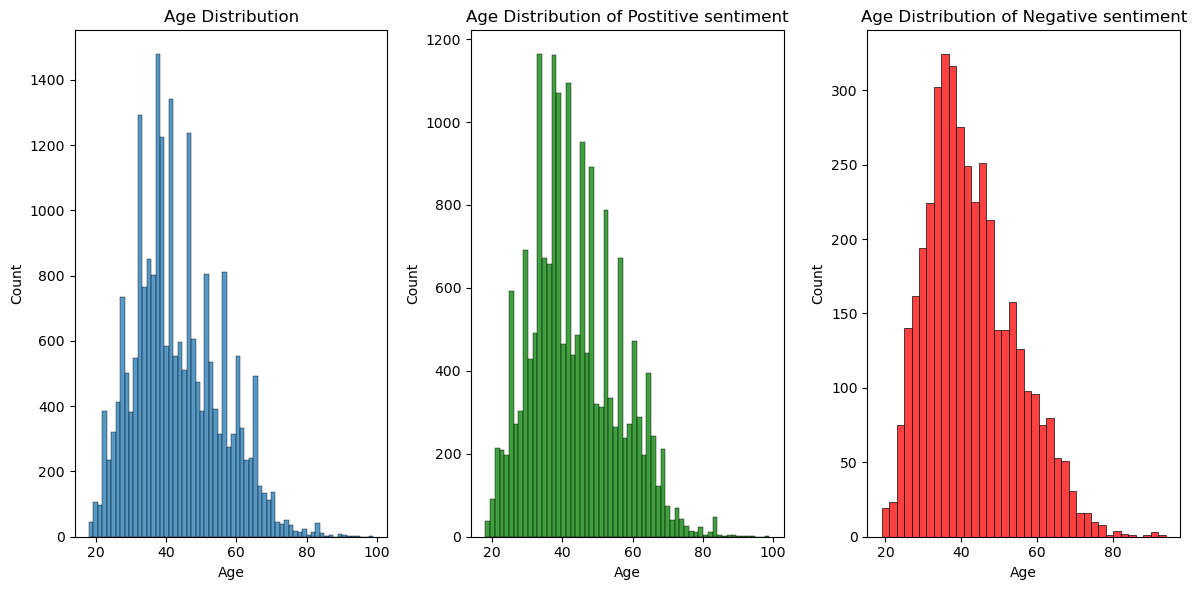

In [7]:
# Plotting age distribution overall and by recommendation sentiment

fig, (ax1, ax2, ax3) = plt.subplots(figsize=(12,6),nrows=1, ncols=3)

sns.histplot(data=df, x='Age', ax=ax1)
ax1.set_title('Age Distribution')


age_0 = df[df['Recommended IND'] == 0]['Age']
age_1 = df[df['Recommended IND'] == 1]['Age']

sns.histplot(age_1, color='green', ax=ax2)
ax2.set_title("Age Distribution of Postitive sentiment")

sns.histplot(age_0, color='red', ax=ax3)
ax3.set_title('Age Distribution of Negative sentiment')
plt.tight_layout()
plt.show()

In [8]:
print(f' Mean Age of Negative distribution: {np.mean(age_0).round(2)}' 
      f'\n Mean Age of Positive distribution: {np.mean(age_1).round(2)}'
      f'\n Overall Mean Age: {np.mean(df['Age']).round(2)}')

 Mean Age of Negative distribution: 42.38
 Mean Age of Positive distribution: 43.48
 Overall Mean Age: 43.28


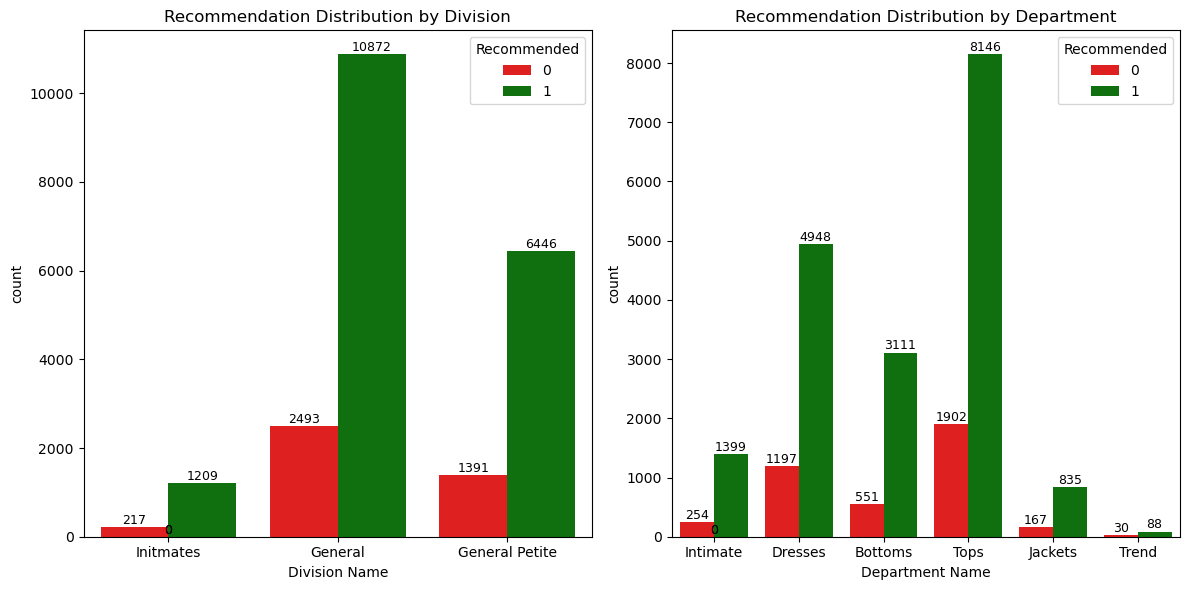

In [9]:
# Plotting recommendation distribution by division and department

fig, (ax1, ax2) = plt.subplots(figsize=(12,6), nrows=1, ncols=2)

sns.countplot(data=df, x='Division Name', hue='Recommended IND', palette={0:'red', 1:'green'}, ax=ax1)
for bar in ax1.patches:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width() / 2, height + 1, f'{height:.0f}',
            ha='center', va='bottom', fontsize=9)
ax1.legend(title='Recommended')
ax1.set_title('Recommendation Distribution by Division')


sns.countplot(data=df, x='Department Name', hue='Recommended IND', palette={0:'red', 1:'green'}, ax=ax2)
for bar in ax2.patches:
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width() / 2, height + 1, f'{height:.0f}',
            ha='center', va='bottom', fontsize=9)
ax2.legend(title='Recommended')
ax2.set_title('Recommendation Distribution by Department')


plt.tight_layout()
plt.show()

In [10]:
# Creating percentage tables of recommendations by division and department
div_table = pd.crosstab(df['Division Name'], df['Recommended IND'], normalize='index') * 100
dep_table = pd.crosstab(df['Department Name'], df['Recommended IND'], normalize='index') * 100

combined = pd.concat(
    [div_table, dep_table],
    keys=["Division", "Department"])
combined

Recommended IND                    0          1
Division   General         18.653199  81.346801
           General Petite  17.749139  82.250861
           Initmates       15.217391  84.782609
Department Bottoms         15.046423  84.953577
           Dresses         19.479251  80.520749
           Intimate        15.366001  84.633999
           Jackets         16.666667  83.333333
           Tops            18.929140  81.070860
           Trend           25.423729  74.576271

C:\Users\pc\AppData\Local\Temp\ipykernel_12972\2792985873.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Recommended IND',  palette={'0':'red', '1':'green'})


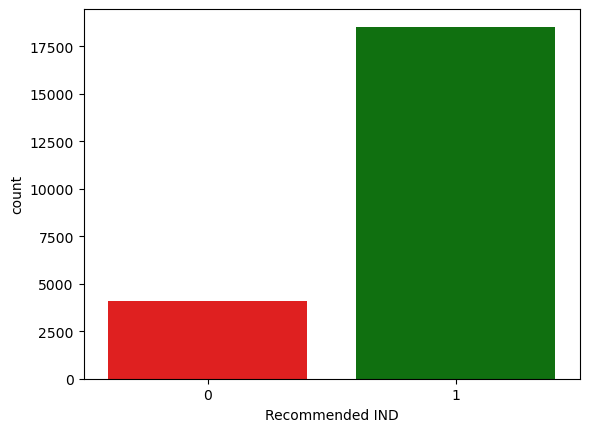

In [11]:
# Plotting overall recommendation distribution
sns.countplot(data=df, x='Recommended IND',  palette={'0':'red', '1':'green'})
plt.show()

## Model implementation

In [12]:
import re
# Text preprocessing function: removes HTML, lowercases, and preserves emoticons

def preprocessor(text):
    rext = re.sub(r'<[^>]*>', '', text)
    emoticons = re.findall(r'(?::|;|=)(?:-)?(?:\)|\(|D|P)', text)
    text = (re.sub(r'[\W]+', ' ', text.lower()) +
            ' '.join(emoticons).replace('-', ''))
    return text

In [13]:
# Applying text preprocessing to the 'Review Text' column
df['Review Text'] = df['Review Text'].apply(preprocessor)

In [14]:
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords

porter = PorterStemmer()

# Tokenizer that stems words
def tokenizer_porter(text):
    return [porter.stem(word) for word in text.split()]
# Simple tokenizer without stemming

def tokenizer(text):
    return text.split()

# Load English stopwords
stop = stopwords.words('english')

In [15]:
# Split data into training and test sets 
from sklearn.model_selection import train_test_split

X, y = df['Review Text'].values, df['Recommended IND'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123, stratify=y)

In [16]:
from sklearn.model_selection import GridSearchCV
from imblearn.pipeline import Pipeline  
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression




# Initialize TFIDF vectorizer 
tfidf = TfidfVectorizer(lowercase=False)

param_grid = [
    {
        'vect__ngram_range': [(1,1)],
        'vect__stop_words': [None],
        'vect__tokenizer': [tokenizer_porter, tokenizer],
        'clf__penalty': ['l2', 'l1'],
        'clf__C' : [ 1.0, 5, 10]
    },
    {
        'vect__ngram_range': [(1,1), (1,2)],
        'vect__stop_words': [stop, None],
        'vect__use_idf': [False],
        'vect__tokenizer': [tokenizer],
        'vect__norm' : ['l2'],
        'clf__penalty': ['l2', 'l1'],
        'clf__C': [ 1.0, 5, 10]
    }
]

# Create a pipeline combining TFIDF vectorizer and logistic regression
lr_tfidf = Pipeline([
    ('vect', tfidf),
    ('clf', LogisticRegression(solver='liblinear'))
])

# Grid search with 5-fold CV using Matthews correlation coefficient
gs_lr_tfidf = GridSearchCV(lr_tfidf,
                           param_grid,
                           scoring='accuracy',
                           cv=5,
                           n_jobs=8)

gs_lr_tfidf.fit(X_train, y_train)

C:\Users\pc\anaconda3\envs\new\Lib\site-packages\sklearn\feature_extraction\text.py:521: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('vect',
                                        TfidfVectorizer(lowercase=False)),
                                       ('clf',
                                        LogisticRegression(solver='liblinear'))]),
             n_jobs=8,
             param_grid=[{'clf__C': [1.0, 5, 10], 'clf__penalty': ['l2', 'l1'],
                          'vect__ngram_range': [(1, 1)],
                          'vect__stop_words': [None],
                          'vect__tokenizer': [<function tokenizer_porter at 0x000001D96750B740>,
                                              <function tokenizer at 0x0000...
                          'vect__stop_words': [['a', 'about', 'above', 'after',
                                                'again', 'against', 'ain',
                                                'all', 'am', 'an', 'and', 'any',
                                                'are', 'aren', "aren't", 'as',
                                                'at', 'be', 'because', 'been',
                                                'before', 'being', 'below',
                                                'between', 'both', 'but', 'by',
                                                'can', 'couldn', "couldn't", ...],
                                               None],
                          'vect__tokenizer': [<function tokenizer at 0x000001D968830CC0>],
                          'vect__use_idf': [False]}],
             scoring='accuracy')

In [17]:
print(f'Best parameter set: {gs_lr_tfidf.best_params_}')

Best parameter set: {'clf__C': 10, 'clf__penalty': 'l2', 'vect__ngram_range': (1, 2), 'vect__norm': 'l2', 'vect__stop_words': None, 'vect__tokenizer': <function tokenizer at 0x000001D968830CC0>, 'vect__use_idf': False}


In [18]:
print(f'CV Accuracy: {gs_lr_tfidf.best_score_:.3f}')
clf_lr = gs_lr_tfidf.best_estimator_
print(f'Test Accuracy: {clf_lr.score(X_test, y_test):.3f}')

CV Accuracy: 0.903


[learning_curve] Training set sizes: [ 1448  2173  2897  3622  4346  5071  5795  6520  7244  7968  8693  9417
 10142 10866 11591 12315 13040 13764 14489]


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  48 out of  95 | elapsed:   37.2s remaining:   36.4s
[Parallel(n_jobs=8)]: Done  95 out of  95 | elapsed:  1.1min finished


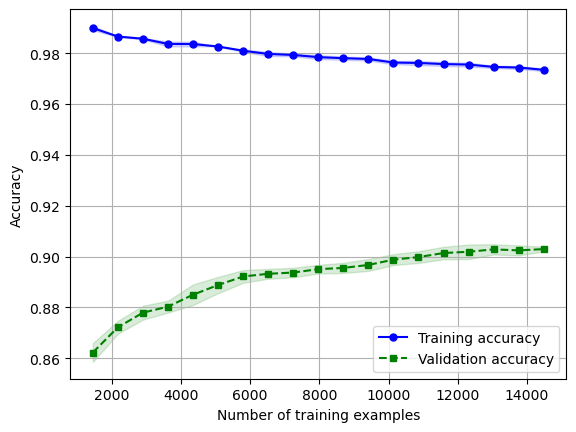

In [19]:
from sklearn.model_selection import learning_curve
# Compute learning curves for the pipeline
train_sizes, train_scores, test_scores = learning_curve(estimator=clf_lr,
                                                        X=X_train,
                                                        y=y_train,
                                                        train_sizes=np.linspace(0.1,1.0,19),
                                                        cv=5,
                                                        scoring='accuracy',
                                                        verbose=2,
                                                        n_jobs=8)
# Calculate mean and standard deviation of training scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
# Calculate mean and standard deviation of validation scores
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)
# Plot learning curve
plt.plot(train_sizes, train_mean,
         color='blue', marker='o',
         markersize=5, label='Training accuracy')
plt.fill_between(train_sizes,
                 train_mean + train_std,
                 train_mean - train_std,
                 alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean,
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='Validation accuracy')
plt.fill_between(train_sizes,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')
plt.grid()
plt.xlabel('Number of training examples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

In [20]:
import scipy.stats
import xgboost as xgb


# Hyperparameter grid for XGBoost with TFIDF features
param_grid = [{
        'vect__ngram_range': [(1,1)],
        'vect__stop_words': [None],
        'vect__tokenizer': [tokenizer_porter, tokenizer],
        'clf__n_estimators': [100, 300, 500],
        'clf__learning_rate': [0.01, 0.02, 0.03, 0.06, 0.08],
        'clf__max_depth': [3, 4]
    },
    {
        'vect__ngram_range': [(1,1)],
        'vect__stop_words': [stop, None],
        'vect__use_idf': [False],
        'vect__tokenizer': [tokenizer],
        'vect__norm' : ['l2'],
        'clf__n_estimators': [100, 300, 500],
        'clf__learning_rate': [0.01, 0.02, 0.03, 0.06, 0.08],
        'clf__max_depth': [3, 4]
    },
             ]

# Pipeline combining TFIDF vectorizer and XGBoost classifier
xgb_tfidf = Pipeline([
    ('vect', tfidf),
    ('clf', xgb.XGBClassifier(device='cuda'))
])

gs_xgb_tfidf = GridSearchCV(xgb_tfidf,
                           param_grid,
                           scoring='accuracy',
                           cv=5,
                           n_jobs=8)

gs_xgb_tfidf.fit(X_train, y_train)

C:\Users\pc\anaconda3\envs\new\Lib\site-packages\joblib\externals\loky\process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
C:\Users\pc\anaconda3\envs\new\Lib\site-packages\sklearn\feature_extraction\text.py:521: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('vect',
                                        TfidfVectorizer(lowercase=False)),
                                       ('clf',
                                        XGBClassifier(base_score=None,
                                                      booster=None,
                                                      callbacks=None,
                                                      colsample_bylevel=None,
                                                      colsample_bynode=None,
                                                      colsample_bytree=None,
                                                      device='cuda',
                                                      early_stopping_rounds=None,
                                                      enable_categorical=False,
                                                      eval_metric=None,
                                                      feature_types=None,
                                                      gamma=None,
                                                      grow_policy=None,
                                                      im...
                          'vect__stop_words': [['a', 'about', 'above', 'after',
                                                'again', 'against', 'ain',
                                                'all', 'am', 'an', 'and', 'any',
                                                'are', 'aren', "aren't", 'as',
                                                'at', 'be', 'because', 'been',
                                                'before', 'being', 'below',
                                                'between', 'both', 'but', 'by',
                                                'can', 'couldn', "couldn't", ...],
                                               None],
                          'vect__tokenizer': [<function tokenizer at 0x000001D968830CC0>],
                          'vect__use_idf': [False]}],
             scoring='accuracy')

In [21]:
print(f'Best parameter set: {gs_xgb_tfidf.best_params_}')

Best parameter set: {'clf__learning_rate': 0.08, 'clf__max_depth': 3, 'clf__n_estimators': 100, 'vect__ngram_range': (1, 1), 'vect__norm': 'l2', 'vect__stop_words': ['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'couldn', "couldn't", 'd', 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven', "haven't", 'having', 'he', "he'd", "he'll", 'her', 'here', 'hers', 'herself', "he's", 'him', 'himself', 'his', 'how', 'i', "i'd", 'if', "i'll", "i'm", 'in', 'into', 'is', 'isn', "isn't", 'it', "it'd", "it'll", "it's", 'its', 'itself', "i've", 'just', 'll', 'm', 'ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't", 'my', 'myself', 'needn', "needn't", 'no', 'n

In [22]:
print(f'CV Accuracy: {gs_xgb_tfidf.best_score_:.3f}')
clf_xgb = gs_xgb_tfidf.best_estimator_
print(f'Test Accuracy: {clf_xgb.score(X_test, y_test):.3f}')

CV Accuracy: 0.827


[learning_curve] Training set sizes: [ 1448  2173  2897  3622  4346  5071  5795  6520  7244  7968  8693  9417
 10142 10866 11591 12315 13040 13764 14489]


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  48 out of  95 | elapsed:   22.1s remaining:   21.6s
[Parallel(n_jobs=8)]: Done  95 out of  95 | elapsed:   41.8s finished


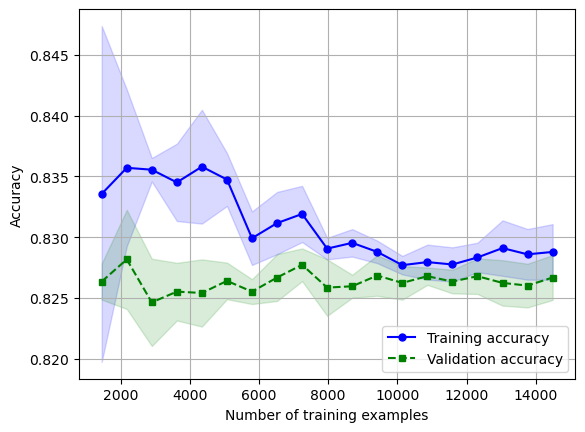

In [23]:
from sklearn.model_selection import learning_curve
# Compute learning curves for the pipeline
train_sizes, train_scores, test_scores = learning_curve(estimator=clf_xgb,
                                                        X=X_train,
                                                        y=y_train,
                                                        train_sizes=np.linspace(0.1,1.0,19),
                                                        cv=5,
                                                        scoring='accuracy',
                                                        verbose=2,
                                                        n_jobs=8)
# Calculate mean and standard deviation of training scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
# Calculate mean and standard deviation of validation scores
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)
# Plot learning curve
plt.plot(train_sizes, train_mean,
         color='blue', marker='o',
         markersize=5, label='Training accuracy')
plt.fill_between(train_sizes,
                 train_mean + train_std,
                 train_mean - train_std,
                 alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean,
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='Validation accuracy')
plt.fill_between(train_sizes,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')
plt.grid()
plt.xlabel('Number of training examples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

In [24]:
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import cross_val_score





# Create a majority voting classifier combining Logistic Regression and XGBoost
mv_clf = VotingClassifier(estimators=[('lr_classifier', clf_lr), ('xgb_classifier',clf_xgb)])


clf_labels = ['Logistic Regression', 'XGBoost','Majority voting']
all_clf = [clf_lr, clf_xgb, mv_clf]

# Evaluate each classifier using 5-fold cross-validation with Matthews correlation
for clf, label in zip(all_clf, clf_labels):
    scores = cross_val_score(estimator=clf,
                             X=X_train,
                             y=y_train,
                             cv=5,
                             scoring='accuracy',
                             n_jobs=8)
    print(f'Model Accuracy: {scores.mean():.2f} 'f'(+/- {scores.std():.2f}) [{label}]')

Model Accuracy: 0.90 (+/- 0.00) [Logistic Regression]
Model Accuracy: 0.83 (+/- 0.00) [XGBoost]
Model Accuracy: 0.90 (+/- 0.00) [Majority voting]


In [25]:
mv_clf.fit(X_train, y_train)

C:\Users\pc\anaconda3\envs\new\Lib\site-packages\sklearn\feature_extraction\text.py:521: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
C:\Users\pc\anaconda3\envs\new\Lib\site-packages\sklearn\feature_extraction\text.py:521: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


VotingClassifier(estimators=[('lr_classifier',
                              Pipeline(steps=[('vect',
                                               TfidfVectorizer(lowercase=False,
                                                               ngram_range=(1,
                                                                            2),
                                                               tokenizer=<function tokenizer at 0x000001D968830CC0>,
                                                               use_idf=False)),
                                              ('clf',
                                               LogisticRegression(C=10,
                                                                  solver='liblinear'))])),
                             ('xgb_classifier',
                              Pipeline(steps=[('vect',
                                               TfidfVectorizer(lowercase=False,
                                                               stop_words=['a',
                                                                           'about',
                                                                           'above',
                                                                           'af...
                                                             grow_policy=None,
                                                             importance_type=None,
                                                             interaction_constraints=None,
                                                             learning_rate=0.08,
                                                             max_bin=None,
                                                             max_cat_threshold=None,
                                                             max_cat_to_onehot=None,
                                                             max_delta_step=None,
                                                             max_depth=3,
                                                             max_leaves=None,
                                                             min_child_weight=None,
                                                             missing=nan,
                                                             monotone_constraints=None,
                                                             multi_strategy=None,
                                                             n_estimators=100,
                                                             n_jobs=None,
                                                             num_parallel_tree=None,
                                                             random_state=None, ...))]))])

C:\Users\pc\anaconda3\envs\new\Lib\site-packages\xgboost\core.py:158: UserWarning: [05:25:24] WARNING: D:\bld\xgboost-split_1733179550881\work\src\common\error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This warning will only be shown once.

  warnings.warn(smsg, UserWarning)


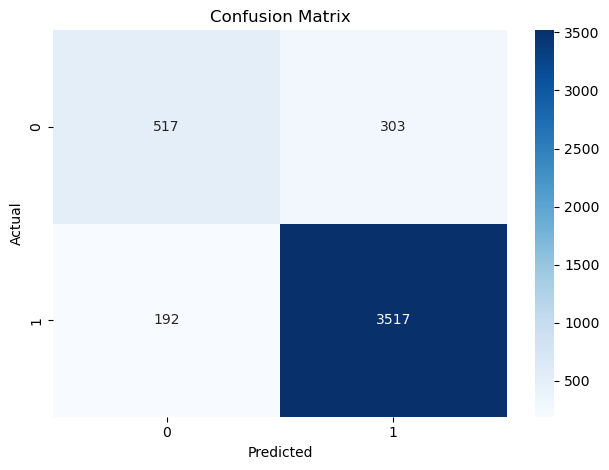

In [26]:
from sklearn.metrics import confusion_matrix

# Predict labels on the test set using the best model from 
y_pred = mv_clf.predict(X_test)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix using a heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')



plt.tight_layout()
plt.show()

In [27]:
from sklearn.metrics import classification_report
# Generate and print a classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.73      0.63      0.68       820
           1       0.92      0.95      0.93      3709

    accuracy                           0.89      4529
   macro avg       0.82      0.79      0.81      4529
weighted avg       0.89      0.89      0.89      4529

